In [1]:
import pandas as pd
import numpy as np
from numpy import pi
import matplotlib.pyplot as plt
import cv2
import random
import math

from scipy.signal import get_window
from scipy.signal import convolve

# Q1. Generating Signal and Convoluting

In [2]:
freqs=list(np.random.randint(1,3,size=5))
phases=list(np.random.uniform(0,pi/2,size=5))
amplitudes=list(np.random.rand(5))

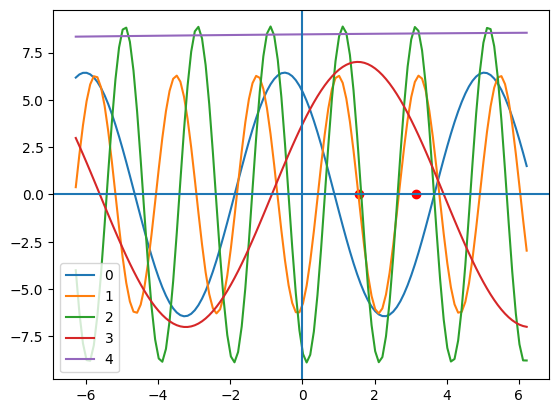

In [3]:

x = np.arange(-2*np.pi, 2*np.pi, 0.1)
sin_signal=x*0

plt.plot(pi/2,0,'ro')
plt.plot(pi,0,'ro')
for i in range(5):
    rng=random.uniform(0,1)
    rng2=random.uniform(-pi,pi)
    rng3=random.uniform(2,10)
    fx = np.sin(x*pi*rng + rng2)*rng3
    # fx = np.sin(x*pi*freqs[i] + phases[i])*amplitudes[i]
    sin_signal=sin_signal+fx
    plt.plot(x,fx,label=str(i))
# plt.plot(x,sin_signal)
plt.axvline(x=0)
plt.axhline(y=0)
plt.legend()




### Generating Singal

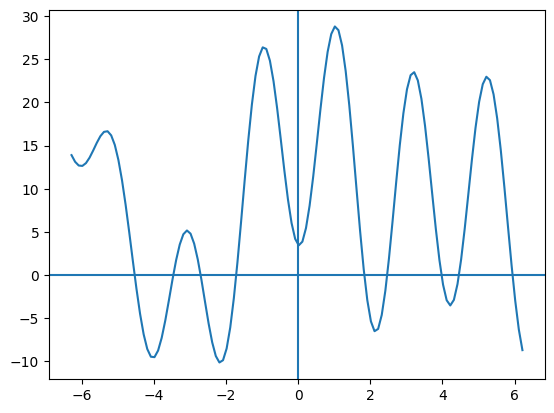

In [4]:
plt.plot(x,sin_signal)
plt.axvline(x=0)
plt.axhline(y=0)

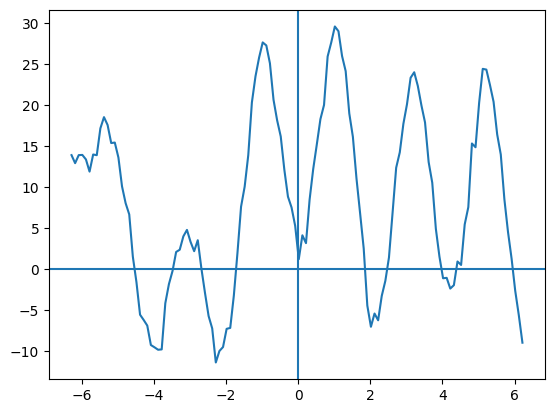

In [8]:
# for i in range(len(signal)):
#     signal[i]+=np.random.normal(0,1,1)*0.5

signal = sin_signal + np.random.normal(0,1,len(sin_signal))
plt.plot(x,signal)
plt.axvline(x=0)
plt.axhline(y=0)

# df = pd.read_csv("good_signal2.csv")
# signal = np.array(df['0'])
# plt.plot(x,signal)

#### Using Numpy Convolve

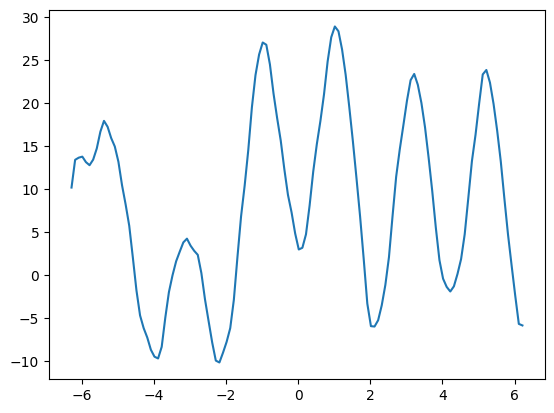

In [74]:
# ans = np.convolve(signal,np.array([1,2,4,8,16,32,64,32,16,8,4,2,1]))
# ans=ans*(1/190)
# plt.plot(x,ans[6:-6])

ans = np.convolve(signal,np.array([1,2,1]))
ans=ans*(1/4)
plt.plot(x,ans[1:-1])

#### Manual Convolution function

In [80]:
def convolution(a,b):
    n=len(a)
    m=len(b)
    l=[]
    for i in range(m):
        temp=0
        for k in range(i):
            # print("h",k,m-k-1,temp)
            temp+=a[k]*b[m-k-1]
        l.append(temp)

    for i in range(n-m+1):
        temp=0
        for k in range(m):
            # print("h",k,k,temp)
            temp+=a[i+k]*b[k]
        l.append(temp)

    for i in range(m):
        temp=0
        for k in range(m-i-1):
            temp+=a[n-k-1]*b[k]
        l.append(temp)

    return np.array(l)

p=[1,2,1]
my_conv=convolution(signal,p)
my_conv=my_conv*(1/4)

(130,)

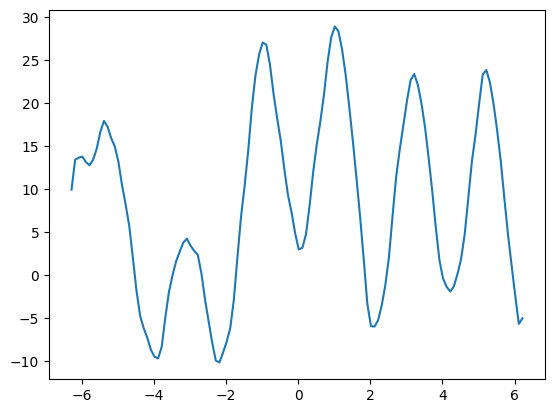

In [82]:
plt.plot(x,my_conv[2:-2])

#### Optimal gaussian window

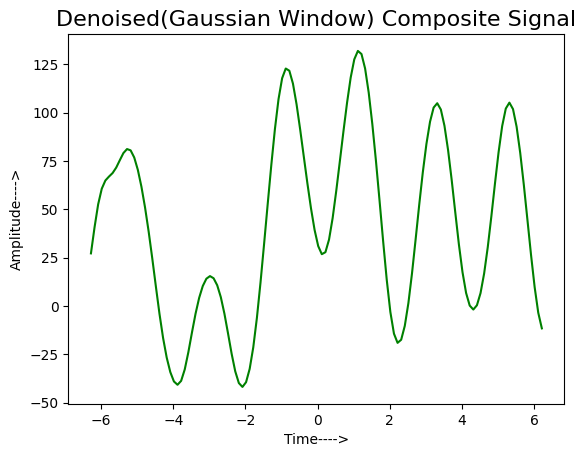

In [12]:
window_gauss=get_window(("gaussian",2),len(signal))
denoised_signal_gauss=convolve(signal,window_gauss,mode='same')

plt.plot(x,denoised_signal_gauss,color="green")
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title("Denoised(Gaussian Window) Composite Signal",fontsize=16)
plt.show()

#### Triangle Window

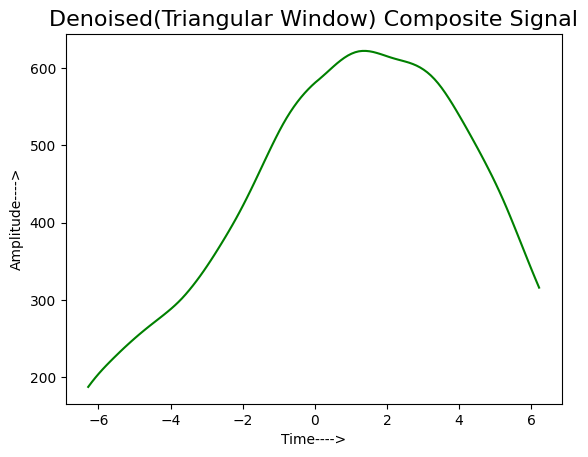

In [13]:
window_triang=get_window("triang",len(x))
denoised_signal_triang=convolve(signal,window_triang,mode='same')

plt.plot(x,denoised_signal_triang,color="green")
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title("Denoised(Triangular Window) Composite Signal",fontsize=16)
plt.show()

# Q2. Resampling

In [57]:
points=list(np.random.randint(0,len(sin_signal),size=int(len(sin_signal)/5)))
points.sort()
# points

#### i. Filling with average values

In [16]:
def mean_fill(signal,points,win):
    cpy = signal.copy()
    for i in range(len(signal)):
        temp=0
        cnt = 0
        if i in points:
            for j in range(i-win,i+win+1):
                if(j<0 or j>=len(signal) or j in points):
                    continue
                else:
                    temp+=cpy[j]
                    cnt+=1
            cpy[i]=temp/cnt
    return cpy


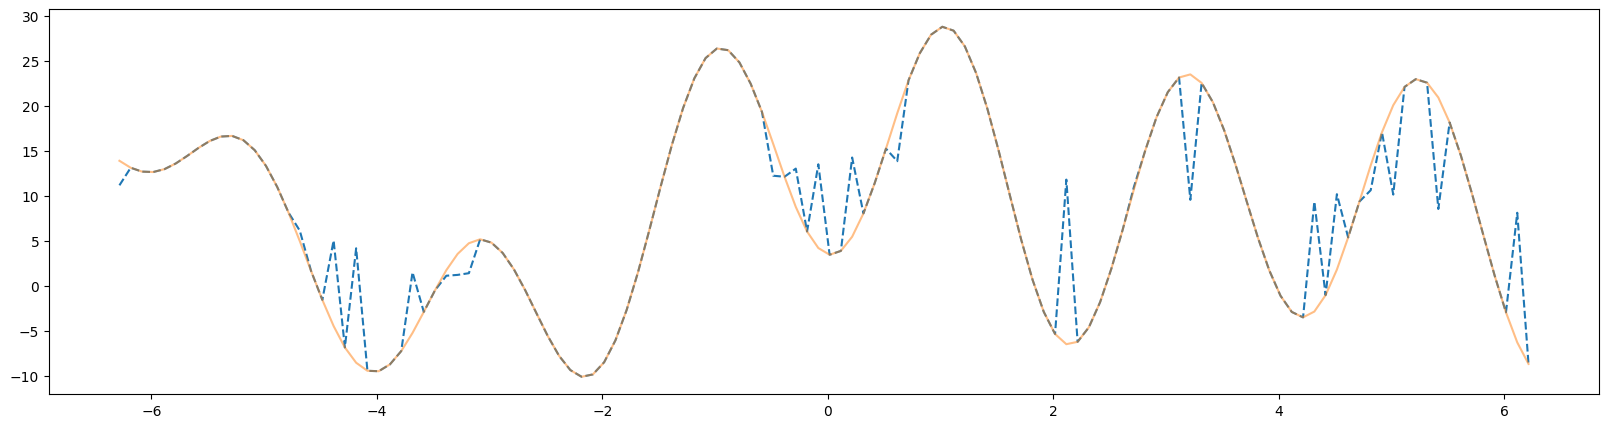

In [17]:
plt.figure(figsize=(20,5))
filter_through_mean = mean_fill(sin_signal,points,20)
plt.plot(x,filter_through_mean,linestyle='--')
plt.plot(x,sin_signal,alpha=0.5)

#### ii. Filling with gaussian weighted average

In [18]:
def normpdf(x, mean, sd):
    var = float(sd)**2
    denom = (2*pi*var)**.5
    num = math.exp(-(float(x)-float(mean))**2/(2*var))
    return num/denom

In [19]:
def gaussian_weighted_fill(signal,points,win,sd):
    cpy = signal.copy()
    g_win = [normpdf(i,0,sd) for i in range(-win,win+1)]
    # plt.plot([i for i in range(1+win*2)],g_win)
    # plt.plot()
    for i in range(len(signal)):
        temp=0
        cnt = 0
        if i in points:
            for j in range(i-win,i+win+1):
                if(j<0 or j>=len(signal) or j in points):
                    continue
                else:
                    temp+=cpy[j]*g_win[j+win-i]
                    cnt+=g_win[j+win-i]
            cpy[i]=temp/cnt
    return cpy

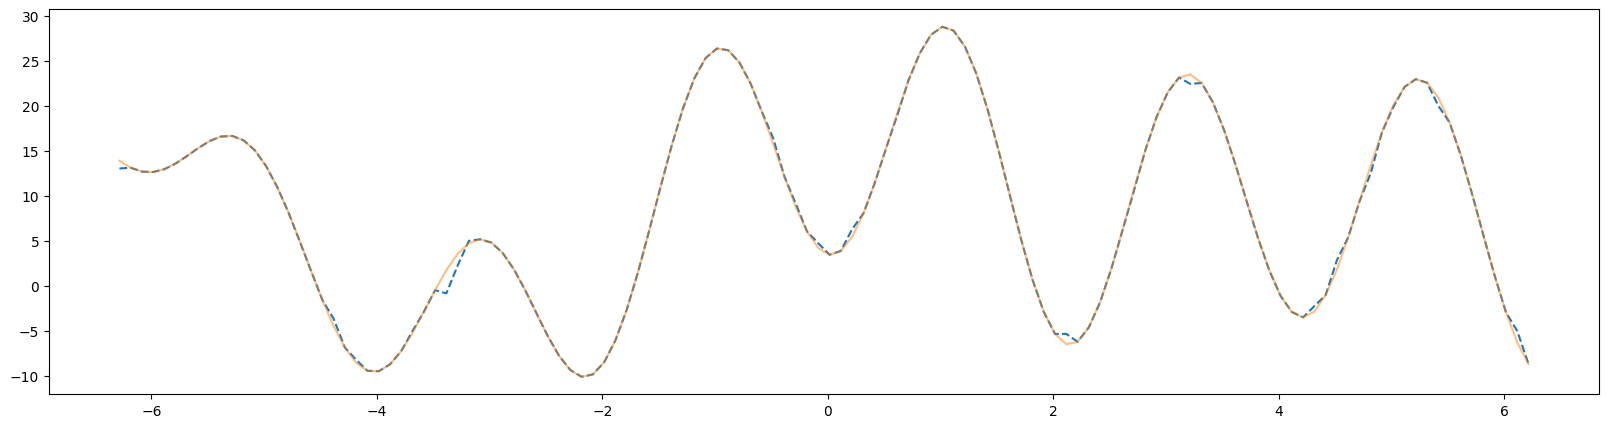

In [21]:
plt.figure(figsize=(20,5))
filter_through_gaussian_agerage = gaussian_weighted_fill(sin_signal,points,10,1)
plt.plot(x,filter_through_gaussian_agerage,linestyle='--')
plt.plot(x,sin_signal,alpha=0.5)

#### iii. Filling with line fit

In [22]:
def fill_line_fit(signal,points):
    cpy = signal.copy()
    for i in range(len(signal)):
        if(i not in points):
            right=i+1
            left=i-1
            while(left>=0 and left in points):
                left-=1
            while(right<len(signal) and right in points):
                right+=1
            if left>=0 and right<len(signal):
                x1,y1=left, signal[left]
                x2,y2=right, signal[right]
                m=(y2-y1)/(x2-x1)
                cpy[i]=y1+m*(i-x1)
    return cpy

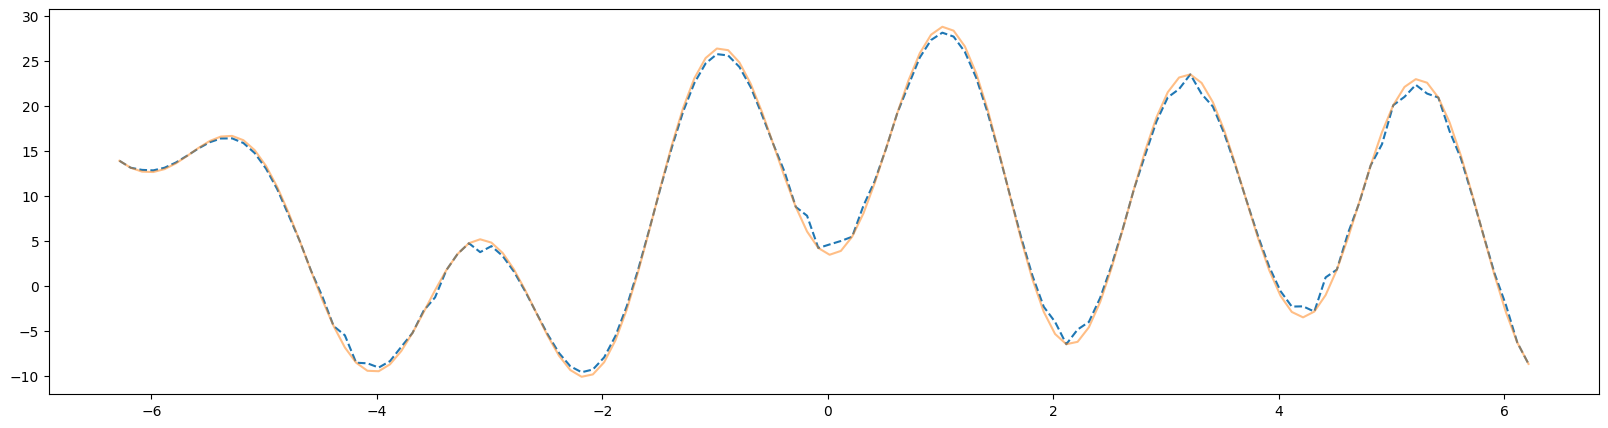

In [23]:
plt.figure(figsize=(20,5))
filter_through_line_fit = fill_line_fit(sin_signal,points)
plt.plot(x,filter_through_line_fit,linestyle='--')
plt.plot(x,sin_signal,alpha=0.5)

# Q3. Image rotation using reverse transformation for interpolation

In [16]:
img=cv2.imread("image1.png",1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
img.shape

(676, 676, 3)

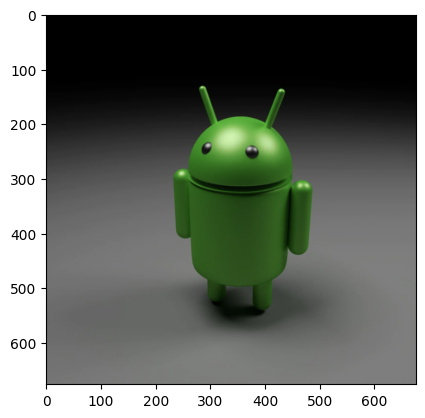

In [17]:
plt.imshow(img)

In [18]:
angle = 10

def rotate_image_cv2(image,angle):
    width, height = img.shape[:2][0],img.shape[:2][1]
    rotation_mat=cv2.getRotationMatrix2D((width/2, height/2), angle, 1)
    rotated_img = cv2.warpAffine(image, rotation_mat, (width, height),flags=cv2.WARP_INVERSE_MAP)
    return rotated_img

cv2_rotated = rotate_image_cv2(img,angle)

In [19]:
def rotate_image(image, angle):
    height, width, channels = image.shape
    rotated_image = np.zeros_like(image)

    # Calculate the rotation matrix
    radians = math.radians(angle)
    sin = math.sin(radians)
    cos = math.cos(radians)

    # Calculate the center of the original image
    center_x = width / 2
    center_y = height / 2

    
    for i in range(height):
        for j in range(width):
            # Calculate the new coordinates after rotation
            x = cos * (j - center_x) - sin * (i - center_y) + center_x
            y = sin * (j - center_x) + cos * (i - center_y) + center_y

            # Use floor and ceil to determine the nearest neighbors
            x1, y1 = math.floor(x), math.floor(y)
            x2, y2 = math.ceil(x), math.ceil(y)

            # Check if the coordinates are within the image bounds
            if 0 <= x1 < width and 0 <= y1 < height and 0 <= x2 < width and 0 <= y2 < height:
                # Bilinear interpolation
                alpha = x - x1
                beta = y - y1
                top_left = image[y1, x1,]
                top_right = image[y1, x2,]
                bottom_left = image[y2, x1,]
                bottom_right = image[y2, x2,]

                rotated_pixel = (1 - alpha) * (1 - beta) * top_left + alpha * (1 - beta) * top_right + (1 - alpha) * beta * bottom_left + alpha * beta * bottom_right

                rotated_image[i, j, ] = rotated_pixel

    return rotated_image

rotated_img = rotate_image(img,-1*angle)


Text(0.5, 1.0, ' CV2 rotation ')

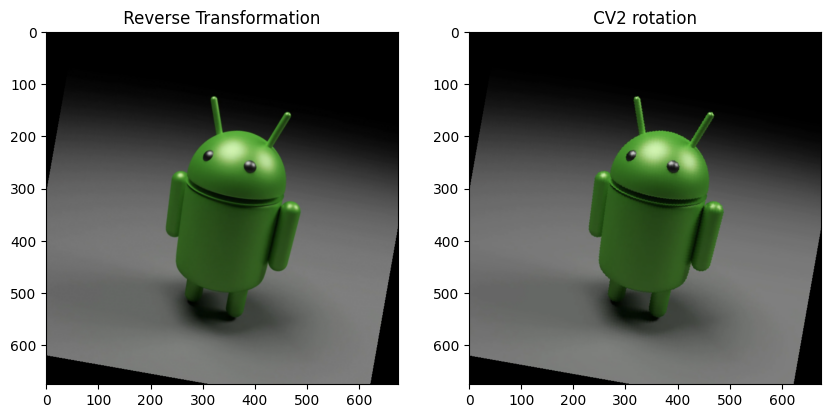

In [21]:
mainplot,(fig1,fig2) = plt.subplots(1,2,figsize=(10,5))

fig1.imshow(rotated_img)
fig1.set_title(" Reverse Transformation ")
fig2.imshow(cv2_rotated)
fig2.set_title(" CV2 rotation ")
# plt.show

# fig, (ax1, ax2) = plt.subplots(1, 2)
# fig.suptitle('Horizontally stacked subplots')
# ax1.plot(x, y)
# ax2.plot(x, -y)